## importing Library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from spacy import tokenizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim 
import gensim.corpora as corpora 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel,TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score,classification_report
import numpy as np

In [7]:
data=pd.read_csv("Sheet_1.csv")

In [8]:
data.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [10]:
data["class_mapped"]=data["class"].map({"not_flagged":0 ,"flagged":1})

In [11]:
data["class_mapped"].value_counts()

0    55
1    25
Name: class_mapped, dtype: int64

In [12]:
data["class_mapped"].head()


0    0
1    1
2    1
3    0
4    0
Name: class_mapped, dtype: int64

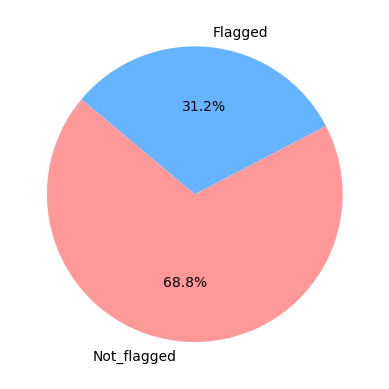

In [13]:
labels=["Not_flagged","Flagged"]
plt.pie(data["class_mapped"].value_counts(),labels=labels, autopct='%1.1f%%',startangle=140, colors=['#ff9999','#66b3ff'])
plt.show()

In [14]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


## Balancing The Datasets


In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [16]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [17]:
data.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,class_mapped
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN,0
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN,1
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN,1
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN,0
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN,0


In [18]:
data_negative=data[data["class_mapped"]==0]

In [19]:
x_negative=data_negative["response_text"]

In [20]:
data_positive=data[data["class_mapped"]==1]

In [21]:
x_positive=data_positive["response_text"]

In [22]:
y_negative=data_negative["class_mapped"]

In [23]:
y_positive=data_positive["class_mapped"]

In [24]:
y_negative

0     0
3     0
4     0
5     0
8     0
10    0
12    0
13    0
14    0
16    0
17    0
18    0
19    0
20    0
23    0
24    0
27    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
37    0
39    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
49    0
50    0
52    0
53    0
54    0
55    0
56    0
58    0
60    0
62    0
63    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
73    0
75    0
77    0
79    0
Name: class_mapped, dtype: int64

In [25]:
y_positive

1     1
2     1
6     1
7     1
9     1
11    1
15    1
21    1
22    1
25    1
26    1
28    1
36    1
38    1
40    1
48    1
51    1
57    1
59    1
61    1
64    1
72    1
74    1
76    1
78    1
Name: class_mapped, dtype: int64

In [26]:
x_negative

0                 I try and avoid this sort of conflict
3     i cant think of one really...i think i may hav...
4     Only really one friend who doesn't fit into th...
5     a couple of years ago my friends was going to ...
8     Listened to someone talk about relationship tr...
10    Took a week off work, packed up the car and pi...
12              Anxious girlfriend always needs my help
13                                                Never
14                                         You as a mom
16    I have helped advise friends who have faced ci...
17                       I've helped friends out before
18    A friend that is a girl and just talk to her t...
19    expressing concern and openness to friends whe...
20                   listening to girlfriend's problems
23    Sometimes my friends bring up issues they are ...
24    never i guess people dont see me as a guy they...
27    i listen pretty damn well. better at that as a...
29    I used to tutor homeless men at a shelter 

In [27]:
x_positive

1     Had a friend open up to me about his mental ad...
2     I saved a girl from suicide once. She was goin...
6     Roommate when he was going through death and l...
7     i've had a couple of friends (you could say mo...
9     I will always listen. I comforted my sister wh...
11    On the memorial anniversary of my friends fath...
15    ex gf was a cutter/suicidal, got her out of he...
21    Friend was thinking about suicide, after a few...
22    Having gone through depression and anxiety mys...
25    Last year, my best friend was diagnosed with a...
26    Cleaning up my friend's campsite and slightly ...
28    Helping a friend through dealing with his alco...
36    Friend who had big addiction issues, ended up ...
38    One of my best friends was diagnosed with canc...
40    Many times for my one friend who tried hard dr...
48    I had a friend that would go off about girls a...
51    My friend was going through a period of intens...
57    My friend dealt with anxiety and this desi

In [28]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

In [29]:
y_positive = y_positive.values.reshape(-1, 1)
y_negative = y_negative.values.reshape(-1, 1)

In [30]:
x_positive = x_positive.values.reshape(-1, 1) if len(x_positive.shape) == 1 else x_positive
x_negative = x_negative.values.reshape(-1, 1) if len(x_negative.shape) == 1 else x_negative

In [31]:
import nlpaug.augmenter.word as naw
def augment_text(sentences):
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_sentences = [aug.augment(sentence) for sentence in sentences]
    return augmented_sentences

augmented_positive_sentences = augment_text(x_positive.ravel())

In [32]:
augmented_negative_sentences = augment_text(x_negative.ravel())

In [33]:
X_resampled = np.concatenate((augmented_positive_sentences, augmented_negative_sentences), axis=0)
y_resampled = np.concatenate((y_positive, y_negative), axis=0)


In [34]:
from sklearn.utils import shuffle
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

In [35]:
pip install nlpaug

Note: you may need to restart the kernel to use updated packages.


## creating resampling data


In [36]:
x_resampled=pd.DataFrame(X_resampled)

In [37]:
y_resampled=pd.DataFrame(y_resampled)

In [38]:
x_resampled.shape

(80, 1)

In [39]:
y_resampled.shape

(80, 1)

In [40]:
y_resampled

,0
0,0
1,1
2,1
3,0
4,1
...,...
75,1
76,0
77,0
78,1


In [41]:
x_resampled

,0
0,"Accept a calendar week cancelled oeuvre, packe..."
1,Get a supporter open upward to maine astir his...
2,My grandmother went through some severe depres...
3,Anxious girlfriend always demand my help
4,Atomic number 53 ' ve had some friends follow ...
...,...
75,My sister has some pretty severe issues with h...
76,I have talked though some major blows in my gi...
77,I haven ' t really met anyone dealing with att...
78,Many meter for my one quaker world health orga...


In [42]:
x_resampled["response"]=x_resampled[0]

In [43]:

x_resampled

,0,response
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe..."
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...
...,...,...
75,My sister has some pretty severe issues with h...,My sister has some pretty severe issues with h...
76,I have talked though some major blows in my gi...,I have talked though some major blows in my gi...
77,I haven ' t really met anyone dealing with att...,I haven ' t really met anyone dealing with att...
78,Many meter for my one quaker world health orga...,Many meter for my one quaker world health orga...


In [44]:
y_resampled["class"]=y_resampled[0]

In [45]:
y_resampled=y_resampled.drop([0],axis=1)

In [46]:
y_resampled

,class
0,0
1,1
2,1
3,0
4,1
...,...
75,1
76,0
77,0
78,1


In [47]:
data_resampled=pd.concat([x_resampled,y_resampled],axis=1)

In [48]:
data_resampled

,0,response,class
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe...",0
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...,1
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...,1
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help,0
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...,1
...,...,...,...
75,My sister has some pretty severe issues with h...,My sister has some pretty severe issues with h...,1
76,I have talked though some major blows in my gi...,I have talked though some major blows in my gi...,0
77,I haven ' t really met anyone dealing with att...,I haven ' t really met anyone dealing with att...,0
78,Many meter for my one quaker world health orga...,Many meter for my one quaker world health orga...,1


In [49]:
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   0         80 non-null     object
 1   response  80 non-null     object
 2   class     80 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


## Pos Tagging

In [50]:
negative=data_resampled[data_resampled["class"]==0]

In [51]:
positive=data_resampled[data_resampled["class"]==1]

In [52]:
nlp=spacy.load("en_core_web_sm")

In [53]:
negative_spacy_docs=list(nlp.pipe(negative["response"]))

In [54]:
positive_spacy_docs=list(nlp.pipe(positive["response"]))

In [55]:
def extract_token_tags(doc:spacy.tokens.doc.Doc):
    return [(i.text,i.ent_type_,i.pos_) for i in doc]

In [56]:
negative_tagsdf=[]
columns=["token","ner_tag","pos_tag"]

In [57]:
for ix , doc in enumerate(negative_spacy_docs):
    tags=extract_token_tags(doc)
    tags=pd.DataFrame(tags)
    tags.columns=columns
    negative_tagsdf.append(tags)

In [58]:
negative_tagsdf=pd.concat(negative_tagsdf)

In [59]:
negative_tagsdf

,token,ner_tag,pos_tag
0,Accept,,VERB
1,a,,DET
2,calendar,,NOUN
3,week,,NOUN
4,cancelled,,VERB
...,...,...,...
45,',,PART
46,lives,,NOUN
47,as,,ADV
48,advantageously,,ADV


In [60]:
positive_tagsdf=[]

for ix , doc in enumerate(positive_spacy_docs):
    tags=extract_token_tags(doc)
    tags=pd.DataFrame(tags)
    tags.columns=columns
    positive_tagsdf.append(tags)

In [61]:
positive_tagsdf=pd.concat(positive_tagsdf)

In [62]:
pos_counts_negative=negative_tagsdf.groupby(["token","pos_tag"]).size().reset_index(name="counts").sort_values(by="counts",ascending=False)
pos_counts_negative.head(10)

,token,pos_tag,counts
9,.,PUNCT,72
42,I,PRON,40
102,and,CCONJ,37
585,to,PART,32
78,a,DET,32
561,the,DET,25
419,of,ADP,24
583,to,ADP,24
8,",",PUNCT,24
3,',PUNCT,18


In [63]:
pos_counts_positive=positive_tagsdf.groupby(["token","pos_tag"]).size().reset_index(name="counts").sort_values(by="counts",ascending=False)
pos_counts_positive.head(10)

,token,pos_tag,counts
7,.,PUNCT,60
73,and,CCONJ,47
32,I,PRON,36
514,to,PART,33
250,her,PRON,32
52,a,DET,30
496,the,DET,25
545,was,AUX,24
363,of,ADP,22
556,with,ADP,20


In [64]:
pos_counts_negative.groupby("pos_tag")["token"].count().sort_values(ascending=False)

pos_tag
NOUN     177
VERB     155
ADJ       73
ADV       59
PRON      42
ADP       27
AUX       27
PROPN     25
SCONJ     16
DET       11
PUNCT      9
NUM        7
CCONJ      5
PART       5
INTJ       4
SYM        1
Name: token, dtype: int64

In [65]:
pos_counts_positive.groupby("pos_tag")["token"].count().sort_values(ascending=False)

pos_tag
NOUN     171
VERB     144
ADJ       61
ADV       46
PRON      34
ADP       28
AUX       21
SCONJ     15
PROPN     12
DET       11
NUM        6
PUNCT      6
CCONJ      5
PART       4
INTJ       1
SYM        1
Name: token, dtype: int64

In [66]:
pos_counts_negative[pos_counts_negative["pos_tag"]=="NOUN"]

,token,pos_tag,counts
258,friends,NOUN,10
257,friend,NOUN,9
445,people,NOUN,9
548,t,NOUN,6
554,technology,NOUN,6
...,...,...,...
244,feeling,NOUN,1
242,feel,NOUN,1
241,family,NOUN,1
234,extent,NOUN,1


In [67]:
pos_counts_positive[pos_counts_positive["pos_tag"]=="NOUN"]

,token,pos_tag,counts
211,friend,NOUN,10
388,people,NOUN,9
359,number,NOUN,8
212,friends,NOUN,7
156,depression,NOUN,6
...,...,...,...
321,maine,NOUN,1
309,listening,NOUN,1
307,lines,NOUN,1
304,light,NOUN,1


## Name Entities

In [68]:
top_entities_neg=negative_tagsdf[negative_tagsdf["ner_tag"]!= ""].groupby(["token","ner_tag"]).size().reset_index(name="counts").sort_values(by="counts",ascending=False)


In [69]:
top_entities_pos=positive_tagsdf[positive_tagsdf["ner_tag"]!= ""].groupby(["token","ner_tag"]).size().reset_index(name="counts").sort_values(by="counts",ascending=False)

In [70]:
ner_palette={
    
    "ORG":sns.color_palette("Set2").as_hex()[0],
    "GPE":sns.color_palette("Set2").as_hex()[1],
    "NORP":sns.color_palette("Set2").as_hex()[2],
    "PERSON":sns.color_palette("Set2").as_hex()[3],
    "DATE":sns.color_palette("Set2").as_hex()[4],
    "CARDINAL":sns.color_palette("Set2").as_hex()[5],
    "PERCENT":sns.color_palette("Set2").as_hex()[6]
}

[Text(0.5, 1.0, 'MOST COMMON NAMED ENTITIES IN NOT Flagged class')]

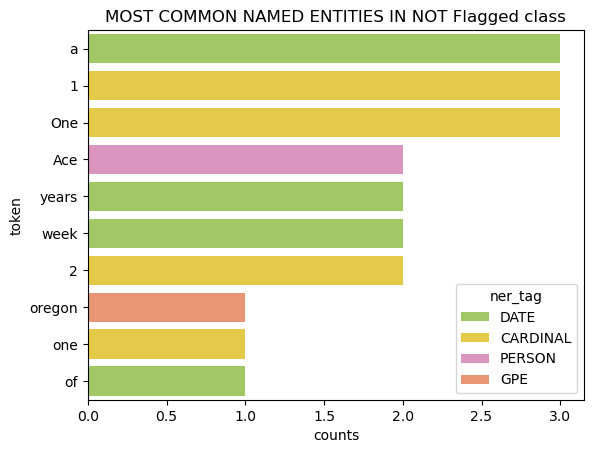

In [71]:
sns.barplot(x="counts",y="token",hue="ner_tag",palette=ner_palette,data=top_entities_neg[:10],
           orient="h",dodge=False).set(title="MOST COMMON NAMED ENTITIES IN NOT Flagged class")

[Text(0.5, 1.0, 'MOST COMMON NAMED ENTITIES IN NOT Flagged class')]

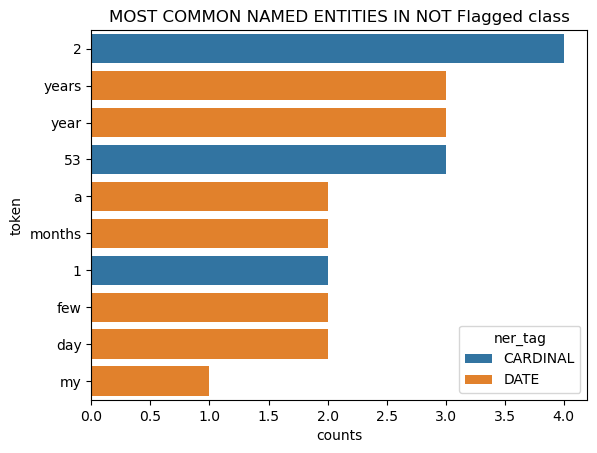

In [72]:
sns.barplot(x="counts",y="token",hue="ner_tag",data=top_entities_pos[:10],orient="h",dodge=False).set(title="MOST COMMON NAMED ENTITIES IN NOT Flagged class")

## The Text Preprocessing

In [73]:
data_resampled.head()

,0,response,class
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe...",0
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...,1
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...,1
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help,0
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...,1


### Cleaning

#### Removing Hyphon

In [74]:
data_resampled["response_clean"]=data_resampled.apply(lambda x:re.sub(r"^[^-]*-\s","",x["response"]),axis=1)

#### Lower Case

In [75]:
data_resampled["response_clean"]=data_resampled["response_clean"].str.lower()

#### Deleting punctuation

In [76]:
data_resampled["response_clean"]=data_resampled.apply(lambda x:re.sub(r"([^\w\s])","",x["response_clean"]),axis=1)

#### Stopwords

In [77]:
en_stopwords=stopwords.words("english")

In [78]:
data_resampled["response_clean"]=data_resampled["response_clean"].apply(lambda x: " ".join([word for word in x.split() if word not in (en_stopwords)]))

#### Tokenize

In [79]:
data_resampled["response_clean"]=data_resampled.apply(lambda x:word_tokenize(x["response_clean"]),axis=1)

#### Lemmatizer 

In [80]:
lemmatizer=WordNetLemmatizer()

In [81]:
data_resampled["response_clean"]=data_resampled["response_clean"].apply(lambda tokens : [lemmatizer.lemmatize(token) for token in tokens])

In [82]:
data_resampled.head()

,0,response,class,response_clean
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe...",0,"[accept, calendar, week, cancelled, oeuvre, pa..."
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...,1,"[get, supporter, open, upward, maine, astir, g..."
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...,1,"[grandmother, went, severe, depression, shortl..."
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help,0,"[anxious, girlfriend, always, demand, help]"
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...,1,"[atomic, number, 53, friend, follow, pronounce..."


In [83]:
tokens_clean=sum(data_resampled["response_clean"],[])

In [84]:
unigrams=(pd.Series(nltk.ngrams(tokens_clean,1)).value_counts())
unigrams[:10]

(friend,)         39
(people,)         19
(help,)           14
(get,)            13
(number,)         11
(helped,)         11
(atomic,)         10
(technology,)     10
(information,)    10
(school,)          9
dtype: int64

[Text(0.5, 1.0, 'Most Common Unigrams After PreProcessing')]

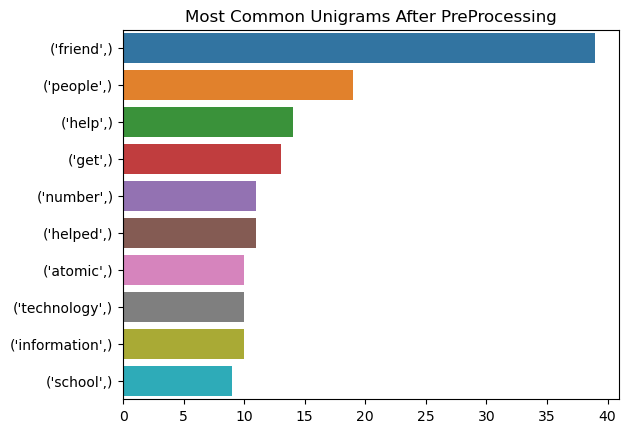

In [85]:
sns.barplot(x=unigrams[:10],y=unigrams.index[:10],
           orient="h"
           ).set(title="Most Common Unigrams After PreProcessing")

In [86]:
bigrams=(pd.Series(nltk.ngrams(tokens_clean,2)).value_counts())
bigrams[:10]

(information, technology)    10
(atomic, number)             10
(number, 2)                   6
(world, health)               4
(health, organization)        4
(let, know)                   3
(number, 53)                  3
(would, go)                   3
(every, day)                  2
(would, call)                 2
dtype: int64

## Sentiment Analysis

In [87]:
vader_sentiment=SentimentIntensityAnalyzer()

In [88]:
data_resampled["vader_sentiment_score"]=data_resampled["response"].apply(lambda x: vader_sentiment.polarity_scores(x)["compound"])

In [89]:
data_resampled.head()

,0,response,class,response_clean,vader_sentiment_score
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe...",0,"[accept, calendar, week, cancelled, oeuvre, pa...",-0.1280
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...,1,"[get, supporter, open, upward, maine, astir, g...",0.1531
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...,1,"[grandmother, went, severe, depression, shortl...",-0.2500
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help,0,"[anxious, girlfriend, always, demand, help]",0.0516
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...,1,"[atomic, number, 53, friend, follow, pronounce...",0.7717


In [90]:
bins=[-1,-0.1,0.1,1]
names=["nagative","neutral","positive"]
data_resampled["vader_sentiment_label"]=pd.cut(data_resampled["vader_sentiment_score"],bins,labels=names)

In [91]:
data_resampled.head()

,0,response,class,response_clean,vader_sentiment_score,vader_sentiment_label
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe...",0,"[accept, calendar, week, cancelled, oeuvre, pa...",-0.1280,nagative
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...,1,"[get, supporter, open, upward, maine, astir, g...",0.1531,positive
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...,1,"[grandmother, went, severe, depression, shortl...",-0.2500,nagative
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help,0,"[anxious, girlfriend, always, demand, help]",0.0516,neutral
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...,1,"[atomic, number, 53, friend, follow, pronounce...",0.7717,positive


<AxesSubplot:>

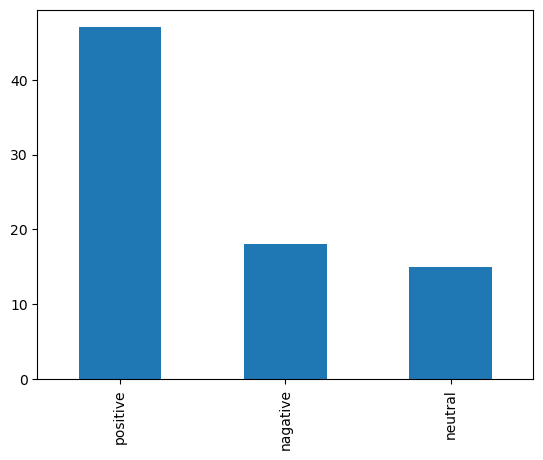

In [92]:
data_resampled["vader_sentiment_label"].value_counts().plot.bar()

[Text(0.5, 1.0, 'Sentiment by News Type')]

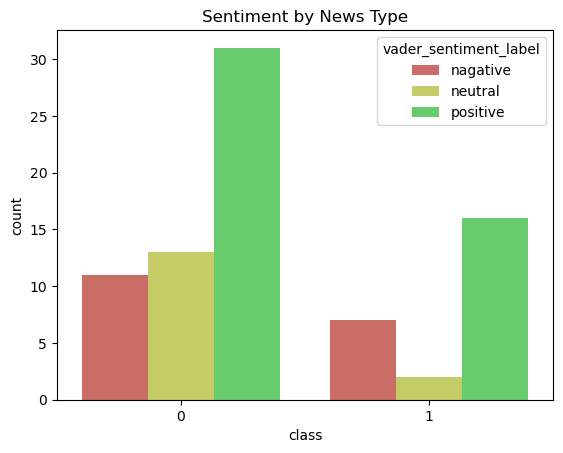

In [93]:
sns.countplot(x="class",hue="vader_sentiment_label",
             palette=sns.color_palette("hls"),
             data=data_resampled).set(title="Sentiment by News Type")

## Topic Observations

### LDA

In [94]:
negative_text= data_resampled[data_resampled["class"]== 0]["response_clean"].reset_index(drop=True)

In [95]:
dictionary_negative=corpora.Dictionary(negative_text)

In [96]:
dictionary_negative

In [97]:
doc_term_negative=[dictionary_negative.doc2bow(text) for text in negative_text]

In [98]:
coherence_values=[]
model_list=[]

min_topics=2
max_topics=11

for num_topics_i in range(min_topics,max_topics+1):
    model=gensim.models.LdaModel(doc_term_negative,num_topics=num_topics_i,id2word=dictionary_negative)
    model_list.append(model)
    coherence_model=CoherenceModel(model=model,texts=negative_text,dictionary=dictionary_negative,coherence="c_v")
    coherence_values.append(coherence_model.get_coherence())

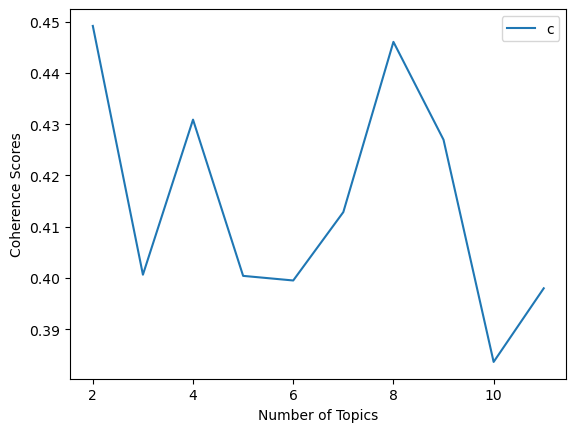

In [99]:
plt.plot(range(min_topics,max_topics+1),coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Scores")
plt.legend(("coherence_values"),loc="best")
plt.show()

In [102]:
nums_topics_lda=9
lda_model=gensim.models.LdaModel(corpus=doc_term_negative,num_topics=nums_topics_lda,id2word=dictionary_negative)
lda_model.print_topics(num_topics=nums_topics_lda,num_words=10)

[(0,
  '0.033*"friend" + 0.022*"girl" + 0.022*"problem" + 0.021*"week" + 0.018*"lot" + 0.016*"astir" + 0.014*"life" + 0.014*"know" + 0.013*"feel" + 0.013*"look"'),
 (1,
  '0.033*"ace" + 0.022*"help" + 0.022*"shit" + 0.015*"friend" + 0.015*"really" + 0.012*"organization" + 0.012*"pitch" + 0.012*"circumstance" + 0.012*"oneself" + 0.012*"mine"'),
 (2,
  '0.020*"one" + 0.020*"going" + 0.020*"help" + 0.020*"situation" + 0.020*"open" + 0.011*"talking" + 0.011*"entirely" + 0.011*"information" + 0.011*"ever" + 0.011*"1"'),
 (3,
  '0.021*"friend" + 0.018*"information" + 0.018*"technology" + 0.017*"listen" + 0.015*"2" + 0.015*"care" + 0.015*"neer" + 0.012*"girl" + 0.012*"like" + 0.011*"astir"'),
 (4,
  '0.020*"school" + 0.020*"imagination" + 0.011*"helped" + 0.011*"organization" + 0.011*"may" + 0.011*"leave" + 0.011*"nursing" + 0.011*"assignment" + 0.011*"someone" + 0.011*"iodine"'),
 (5,
  '0.021*"friend" + 0.020*"feel" + 0.020*"follow" + 0.020*"school" + 0.020*"problem" + 0.011*"help" + 0.011*

## TFIDF

In [103]:
def tfidf_corpus(doc_term_matrix):
    tfidf=TfidfModel(corpus=doc_term_matrix,normalize=True)
    corpus_tfidf= tfidf[doc_term_matrix]
    return corpus_tfidf

def get_coherence_scores(corpus,dictionary,text,min_topics,max_topics):
    coherence_values=[]
    model_list=[]
    for num_topics_i in range(min_topics,max_topics+1):
        model=LsiModel(corpus,num_topics= num_topics_i,id2word=dictionary )
        model_list.append(model)
        coherence_model=CoherenceModel(model=model,texts=text,dictionary=dictionary,coherence="c_v")
        coherence_values.append(coherence_model.get_coherence())
    plt.plot(range(min_topics,max_topics+1),coherence_values)
    plt.xlabel("number of topics")
    plt.ylabel("coherence score ")
    plt.legend(("coherence_values"),loc="best")
    plt.show()

In [104]:
corpus_tfidf_negative=tfidf_corpus(doc_term_negative)

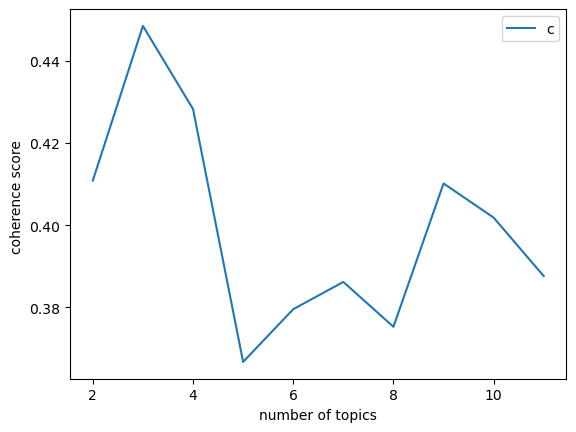

In [105]:
get_coherence_scores(corpus_tfidf_negative,dictionary_negative,negative_text,min_topics=2,max_topics=11)

In [106]:
lsa_model=LsiModel(corpus_tfidf_negative,id2word=dictionary_negative,num_topics=6)
lsa_model.print_topics()

[(0,
  '1.000*"neer" + 0.000*"time" + 0.000*"friend" + 0.000*"talking" + 0.000*"problem" + 0.000*"girlfriend" + 0.000*"always" + 0.000*"help" + 0.000*"people" + 0.000*"astir"'),
 (1,
  '-0.303*"time" + -0.249*"friend" + -0.217*"talking" + -0.201*"problem" + -0.198*"girlfriend" + -0.174*"always" + -0.166*"help" + -0.155*"people" + -0.145*"astir" + -0.138*"done"'),
 (2,
  '0.331*"health" + 0.331*"organization" + 0.331*"world" + 0.318*"school" + 0.177*"mortal" + 0.177*"struggling" + 0.174*"imagination" + 0.160*"live" + 0.157*"simply" + 0.155*"scramble"'),
 (3,
  '-0.403*"time" + -0.347*"talking" + 0.191*"always" + 0.189*"ace" + -0.179*"helped" + -0.175*"done" + 0.173*"problem" + -0.152*"stuff" + -0.131*"admirer" + 0.128*"shit"'),
 (4,
  '-0.385*"girlfriend" + -0.211*"listening" + -0.203*"anxious" + -0.201*"always" + -0.192*"problem" + -0.177*"demand" + 0.167*"2" + 0.146*"information" + 0.146*"technology" + -0.142*"time"'),
 (5,
  '-0.261*"problem" + 0.241*"ace" + -0.237*"bring" + 0.220*"s

## Classification

In [107]:
data_resampled.head()

,0,response,class,response_clean,vader_sentiment_score,vader_sentiment_label
0,"Accept a calendar week cancelled oeuvre, packe...","Accept a calendar week cancelled oeuvre, packe...",0,"[accept, calendar, week, cancelled, oeuvre, pa...",-0.1280,nagative
1,Get a supporter open upward to maine astir his...,Get a supporter open upward to maine astir his...,1,"[get, supporter, open, upward, maine, astir, g...",0.1531,positive
2,My grandmother went through some severe depres...,My grandmother went through some severe depres...,1,"[grandmother, went, severe, depression, shortl...",-0.2500,nagative
3,Anxious girlfriend always demand my help,Anxious girlfriend always demand my help,0,"[anxious, girlfriend, always, demand, help]",0.0516,neutral
4,Atomic number 53 ' ve had some friends follow ...,Atomic number 53 ' ve had some friends follow ...,1,"[atomic, number, 53, friend, follow, pronounce...",0.7717,positive


In [108]:
X=[",".join(map(str,l)) for l in data_resampled["response_clean"]]

In [109]:
Y=data_resampled["class"]

In [110]:
countvec=CountVectorizer()

In [111]:
countvec_fit=countvec.fit_transform(X)

In [112]:
bag_of_words=pd.DataFrame(countvec_fit.toarray(),columns=countvec.get_feature_names_out())

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(bag_of_words,Y,test_size=0.2,random_state=365)

### Logistic Regression

In [114]:
lr=LogisticRegression(random_state=85).fit(X_train,Y_train)

In [115]:
y_pred_lr=lr.predict(X_test)

In [116]:
accuracy_score(y_pred_lr,Y_test)

0.5625

In [117]:
print(classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       0.00      0.00      0.00         7

    accuracy                           0.56        16
   macro avg       0.28      0.50      0.36        16
weighted avg       0.32      0.56      0.40        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [118]:
svm=SGDClassifier(random_state=85).fit(X_train,Y_train)

In [119]:
y_pred_svm=svm.predict(X_test)

In [120]:
accuracy_score(y_pred_svm,Y_test)

0.75

In [121]:
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.43      0.60         7

    accuracy                           0.75        16
   macro avg       0.85      0.71      0.71        16
weighted avg       0.83      0.75      0.72        16



## Naive Bayes

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [126]:
mnb = MultinomialNB().fit(X_train, Y_train)

In [127]:
y_pred_svm=mnb.predict(X_test)

In [128]:
accuracy_score(y_pred_svm,Y_test)

0.625

In [129]:
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.60      0.43      0.50         7

    accuracy                           0.62        16
   macro avg       0.62      0.60      0.60        16
weighted avg       0.62      0.62      0.61        16



### Deep Learning

In [143]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D

In [135]:
X_train, X_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [163]:
model = Sequential()
model.add(Embedding(input_dim=686, output_dim=100, input_length=686))
model.add(LSTM(units=100))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [165]:
vocab_size = len(countvec.get_feature_names_out())
vocab_size

686

In [166]:
model.fit(X_train, Y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6861 - accuracy: 0.7843 - val_loss: 0.6973 - val_accuracy: 0.4615
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6662 - accuracy: 0.7843 - val_loss: 0.7025 - val_accuracy: 0.4615
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.6462 - accuracy: 0.7843 - val_loss: 0.7103 - val_accuracy: 0.4615
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6254 - accuracy: 0.7843 - val_loss: 0.7221 - val_accuracy: 0.4615
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.6032 - accuracy: 0.7843 - val_loss: 0.7409 - val_accuracy: 0.4615
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5794 - accuracy: 0.7843 - val_loss: 0.7723 - val_accuracy: 0.4615
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5543 - accuracy: 0.7843 - val_loss: 0.8297 - val_accuracy: 0.4615
Epoch 8/10
1/1 [=========================

In [167]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 312ms/step


In [168]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 [==============================] - 0s 116ms/step - loss: 0.9502 - accuracy: 0.5625
Loss: 0.9501838088035583, Accuracy: 0.5625
